In [109]:
from bs4 import BeautifulSoup as bs
import urllib

In [110]:
#Mengambil Link Berita
url = 'https://news.detik.com/indeks/all/?date=11/15/2018'
html = urllib.request.urlopen(url).read()
print(str(html[:2000])+'...')

b'<!DOCTYPE html>\n<html>\n<head>\n    <title>Indeks berita terbaru hari ini dari isu terkini di indonesia</title>\n<meta name="description" content="Indeks berita terbaru hari ini dari peristiwa, kecelakaan, kriminal, hukum, berita unik, Politik, dan liputan khusus di Indonesia dan Internasional" itemprop="description" />\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="text/html; charset=UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<link href="https://plus.google.com/+detikcom" rel="publisher" />\n\n\t\t<meta property="og:type" content="article" />\n\t\t<meta property="og:site_name" content="detiknews" />\n\t\t<meta property="og:title" content="Indeks berita terbaru hari ini dari isu terkini di indonesia" />\n\t\t<meta property="og:image" content="https://akcdn.detik.net.id/logo_tematik/logodetiknews.png" />\n\t\t<meta property="og:description" content="Indeks berita terbaru hari ini dari peristiwa, kecelakaan, kriminal, huk

In [111]:
#Inisialisi Crawling di halaman pertama
soup = bs(html,'lxml')
divs = soup.find_all('div', attrs={'class':'desc_idx ml10'})
news_links = []
for div in divs:
    news_links.append(div.a['href'])
news_links

['https://news.detik.com/detiktv/d-4304014/saya-belum-mau-pulang-sebelum-anak-saya-teridentifikasi',
 'https://news.detik.com/berita/d-4304013/gempa-magnitudo-39-terjadi-di-sigi',
 'https://news.detik.com/berita/d-4304010/sulsel-mati-lampu-2-kebakaran-terjadi-akibat-lilin-dan-genset',
 'https://news.detik.com/berita/d-4304006/cucu-wiranto-meninggal-karena-tercebur-kolam-di-rumah',
 'https://news.detik.com/berita/d-4304003/terjawabnya-misteri-diam-si-kancil-di-malam-pembantaian',
 'https://news.detik.com/berita/d-4304002/sandi-akan-adopsi-kebijakan-swasembada-pangan-rezim-orde-baru',
 'https://news.detik.com/berita/d-4304004/malaysia-ingin-ada-kerja-sama-alutsista-di-asean',
 'https://news.detik.com/berita/d-4304001/bawaslu-usul-6-provinsi-diberi-waktu-30-hari-tetapkan-dpt-perbaikan',
 'https://news.detik.com/berita/d-4303975/ini-wilayah-yang-jadi-atensi-patroli-perbatasan-menhan-ri-malaysia',
 'https://news.detik.com/berita/d-4303974/pilpres-2019-batu-loncatan-untuk-pilpres-2024-ini-ka

In [112]:
#Crawling di halaman pertama
titles = []
articles = []    
for news_link in news_links:
    if 'https://news.detik.com/indeks/all/1?date=11/15/2018' in news_link:
        sub_url = news_link
        sub_html = urllib.request.urlopen(sub_url).read()
        sub_soup = bs(sub_html,'lxml')
        
        title = sub_soup.find_all('div', attrs={'class':'desc_idx ml10'})[0].a.text
        article = sub_soup.find_all('div', attrs={'class':'detail_text'})[0].text.strip()
        
        titles.append(title)
        articles.append(article)
titles

[]

In [113]:
#Inisiasi dan crawling ke halaman selanjutnya dengan Loop

for page in range(2,20):
    url = 'https://news.detik.com/indeks/all/'+str(page)+'?date=11/15/2018'
    html = urllib.request.urlopen(url).read()
    
    soup = bs(html,'lxml')
    divs = soup.find_all('div', attrs={'class':'desc_idx ml10'})
    
    news_links = []
    for div in divs:
        news_links.append(div.a['href'])
        
    for news_link in news_links:
        if 'https://news.detik.com/berita' in news_link:
            sub_url = news_link
            sub_html = urllib.request.urlopen(sub_url).read()
            sub_soup = bs(sub_html,'lxml')
            
            title = sub_soup.find_all('div', attrs={'class':'jdl'})[0].h1.text
            article = sub_soup.find_all('div', attrs={'class':'detail_text'})[0].text.strip()
            
            titles.append(title)
            articles.append(article)

In [114]:
#Menyimpan data ke dalam tabel Pandas
import pandas as pd
table = pd.DataFrame(columns = ['title','article'])

table['title'] = titles
table['article'] = articles

table

,title,article
0,Bawaslu Nyatakan Gerakan Emas Prabowo Tak Mela...,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tBawaslu DKI m...
1,KPK Cari Tahu Pembahasan di DPRD Bekasi Terkai...,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tKPK memeriksa...
2,"Puncak Kirab Pemuda 2018, Menpora Minta Promos...",Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tMenteri Pemud...
3,"HS Beralibi di Cikarang di Malam Pembunuhan, T...","Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tHS, terduga p..."
4,Ini Profesi Bule Rusia yang Kesasar di Proboli...,Probolinggo -\n\t\t\t\t\t\t\t\t\t\t\tTuris asa...
5,"Sikunang, Aplikasi untuk Mudahkan Pengadaan Ta...",Semarang -\n\t\t\t\t\t\t\t\t\t\t\tSering muncu...
6,Anang Sesalkan Cyberbully ke Film 'Hanum & Ran...,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tAnggota Komis...
7,"Sopir GrabCar Tinggal Tulang, Otak Pembunuhnya...",Palembang -\n\t\t\t\t\t\t\t\t\t\t\tKasubdit Ja...
8,Eni Saragih Disebut Beri SGD 50 Ribu ke Idrus ...,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tTerdakwa perk...
9,Polres Indramayu Tembak Mati Perampok Sadis To...,Indramayu -\n\t\t\t\t\t\t\t\t\t\t\tPolisi mene...


In [115]:
writer = pd.ExcelWriter('resultArkademy.xlsx')
table.to_excel(writer,'Sheet1',index=False)
writer.save()

In [116]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import matplotlib.pyplot as plt

In [117]:
df = pd.read_excel('resultArkademy.xlsx', index_col=0)
df.head()

,article
title,
Bawaslu Nyatakan Gerakan Emas Prabowo Tak Melanggar Aturan Pemilu,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tBawaslu DKI m...
KPK Cari Tahu Pembahasan di DPRD Bekasi Terkait Meikarta,Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tKPK memeriksa...
"Puncak Kirab Pemuda 2018, Menpora Minta Promosikan Keindahan RI",Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tMenteri Pemud...
"HS Beralibi di Cikarang di Malam Pembunuhan, Ternyata Datang Pagi","Jakarta -\n\t\t\t\t\t\t\t\t\t\t\tHS, terduga p..."
Ini Profesi Bule Rusia yang Kesasar di Probolinggo,Probolinggo -\n\t\t\t\t\t\t\t\t\t\t\tTuris asa...


In [118]:
print("Ada {} berita yang didapatkan dari detik.com pada tanggal 15 November \n".format(df.shape[0]))


Ada 141 berita yang didapatkan dari detik.com pada tanggal 15 November 



In [119]:
# # Start with one review:

# text = df.article[21]

# # Create and generate a word cloud image:
# wordcloud = WordCloud().generate(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [120]:
# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [121]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [122]:
text = " ".join(review for review in df.article)
print ("Ada {} kata didalam semua artikel.".format(len(text)))

Ada 322346 kata didalam semua artikel.


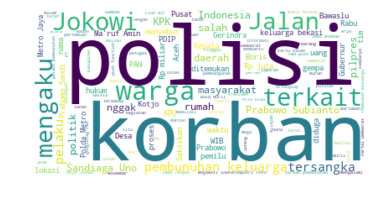

In [136]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
#Create factory
stop_factory = StopWordRemoverFactory()
more_stopword = ['<!--// <![CDATA[','detikcom','OA_show',"newstag'",')','// ]]> -->','tahun','HS','CDATA','Baca',"hiddenquiz'",'Jakarta','Kamis',"Video","20detik"]
 
# Tambahkan Stopword Baru
data = stop_factory.get_stop_words()+more_stopword

# Generate a word cloud image
wordcloud = WordCloud(stopwords=data, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()